# K - Nearest Neighbours
Naive efficiency approach, no weighted mean for neighbours at different distance 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Assumptions
# - There are only two classes, labelled using -1 or +1.

def k_NN_2class(X_train, y_train, X_pred, k=3, weights='Uniform'):
    # Initialize the arrray to store the predictive labels
    y_pred = np.zeros(len(X_pred))
    
    # Do this on a per - sample case
    for i, cur_x in enumerate(X_pred):
        # Compute the euclidean distance between each X pred and all X_trains
        xX_norms = np.linalg.norm( np.subtract(X_train,cur_x) , axis=1)
        
        # Find the index of the k smallest indeces
        # Help from: https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array   
        k_NN_idxs = np.argpartition(xX_norms, k)[:k]
        
        # Compute the label (y) mean of the k neighbours
        if weights == 'Uniform':
            y_pred[i] = np.average(y_train[k_NN_idxs])
        if weights == 'Distance':
            y_pred[i] = np.average(y_train[k_NN_idxs], weights=np.divide(1, xX_norms[k_NN_idxs]) )
        
    # After all is done, map the real y values to the label values
    y_pred[y_pred < 0] = min(y_train)
    y_pred[y_pred >= 0] = max(y_train)

    return y_pred
    

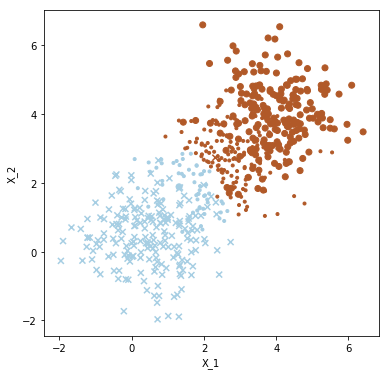

In [3]:
# Simulate data 
sim_size_per_class = 200

# Simulate two classes of multivariate gaussian data
sim_cov_mat = np.diag([0.8,0.8])
sim_c1_X = np.random.multivariate_normal([4, 4], sim_cov_mat, size=sim_size_per_class)
sim_c1_y = np.ones(sim_size_per_class)

sim_c2_X = np.random.multivariate_normal([0.5, 0.5], sim_cov_mat, size=sim_size_per_class)
sim_c2_y = np.ones(sim_size_per_class) * (-1)

# Concatenate the classes
sim_X = np.vstack((sim_c1_X, sim_c2_X))
sim_y = np.concatenate((sim_c1_y, sim_c2_y))

# Simulate a new dataset and see how it classifies
sim_test_X = np.random.multivariate_normal([2.5, 2.5], sim_cov_mat, size=sim_size_per_class)

# Predict the training set
sim_pred_y = k_NN_2class(sim_X, sim_y, sim_X)

# Predict the test set
sim_pred_test_y = k_NN_2class(sim_X, sim_y, sim_test_X, k=4, weights='Uniform')

# Plot the data
plt.figure(figsize=(6,6))
simColourmap = plt.get_cmap('Paired')
simCNorm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
# Plot the training set
plt.scatter(sim_c1_X[:,0], sim_c1_X[:,1], marker='o', cmap=simColourmap, norm=simCNorm, c=sim_pred_y[:sim_size_per_class])   
plt.scatter(sim_c2_X[:,0], sim_c2_X[:,1], marker='x', cmap=simColourmap, norm=simCNorm, c=sim_pred_y[sim_size_per_class:])   
# Plotting the test set
plt.scatter(sim_test_X[:,0], sim_test_X[:,1], marker='.', cmap=simColourmap, norm=simCNorm, c=sim_pred_test_y)   
# Labels
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.show()